In [1]:
import pandas as pd
import numpy as np
import lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import ExtraTreesRegressor, HistGradientBoostingRegressor
import sklearn
import matplotlib.pyplot as plt

# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# prepare the cross-validation procedure

# compare different numbers of features selected using mutual information
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt
import mpl_scatter_density
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import LeavePGroupsOut
from sklearn.metrics import mean_squared_error
from scipy import stats

c:\Anaconda\envs\lazypredict\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv('Dataset/aod-pm2.5-csv/AOD_with_CWV-daily-2019.csv', parse_dates=['From Date'], dayfirst=True)
df['month'] =df['From Date'].dt.month
df['MOYx'] = np.sin(2*np.pi*df['From Date'].dt.dayofyear/12)
df['MOYy'] = np.cos(2*np.pi*df['From Date'].dt.dayofyear/12)
df['WOYx'] = np.sin(2*np.pi*df['From Date'].dt.weekofyear/52)
df['WOYy'] = np.cos(2*np.pi*df['From Date'].dt.weekofyear/52)
df['nAOD47'] = df['AOD47']/(df['ColumnWV'])
df['cardinalday'] = df['From Date'].dt.dayofyear

df2 = pd.read_csv('Dataset/aod-pm2.5-csv/AOD_with_CWV-daily-2020.csv', parse_dates=['From Date'], dayfirst=True)
df2 = df2.drop(columns=['AT'])
df2['month'] =df2['From Date'].dt.month
df2['MOYx'] = np.sin(2*np.pi*df2['From Date'].dt.dayofyear/12)
df2['MOYy'] = np.cos(2*np.pi*df2['From Date'].dt.dayofyear/12)
df2['WOYx'] = np.sin(2*np.pi*df2['From Date'].dt.weekofyear/52)
df2['WOYy'] = np.cos(2*np.pi*df2['From Date'].dt.weekofyear/52)
df2['nAOD47'] = df2['AOD47']/(df2['ColumnWV'])
df2['cardinalday'] = df2['From Date'].dt.dayofyear

df = df.append(df2)
df.to_csv('final_data_19_20.csv')

df = df.drop(df[df['PM2.5']>500].index)
df2 = df2.drop(df2[df2['PM2.5']>500].index)

GradientBoostingRegressor(random_state=50)
Initial Features:  ['PM2.5', 'station id', 'AOD47']
0.2807881728961885
70.91947254841777
Initial Features:  ['PM2.5', 'station id', 'AOD47', 'ColumnWV']
0.565557534386836
55.119240102886266
Initial Features:  ['PM2.5', 'station id', 'AOD47', 'ColumnWV', 'RH', 'WS', 'SR', 'BP']
0.6465213421289098
49.69760178452992
Initial Features:  ['PM2.5', 'station id', 'AOD47', 'ColumnWV', 'NOx', 'SO2', 'NH3', 'CO']
0.7287639869257683
44.530117770851284
Initial Features:  ['PM2.5', 'station id', 'AOD47', 'ColumnWV', 'RH', 'WS', 'SR', 'BP', 'latitude', 'longitude', 'cardinalday']
0.7958789602631091
37.765715670078976
Initial Features:  ['PM2.5', 'station id', 'AOD47', 'ColumnWV', 'NOx', 'SO2', 'NH3', 'CO', 'latitude', 'longitude', 'cardinalday']
0.8411140520581849
34.08183051512207
XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, g

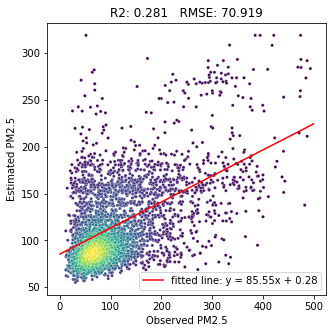

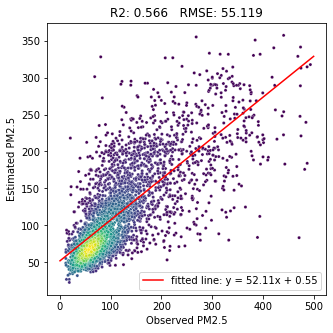

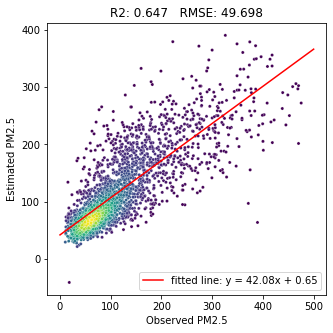

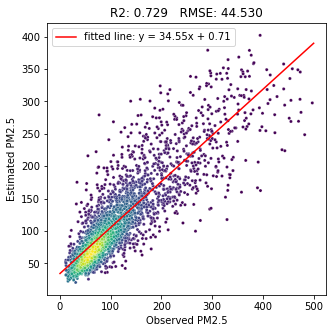

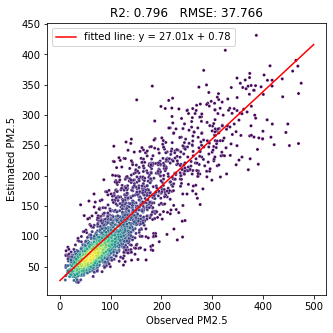

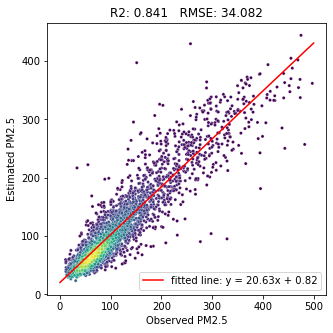

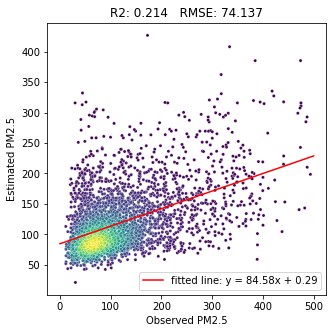

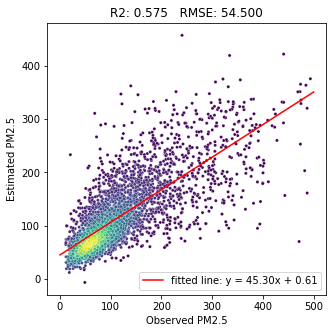

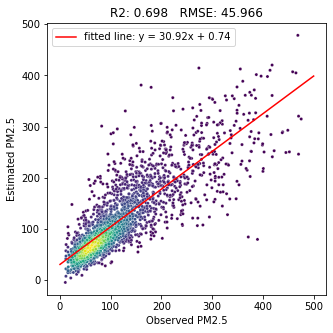

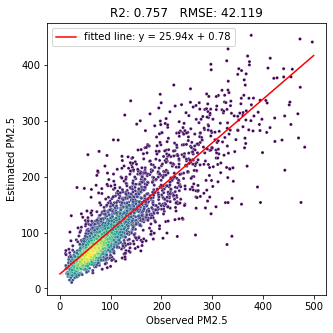

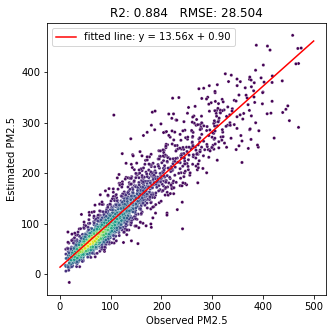

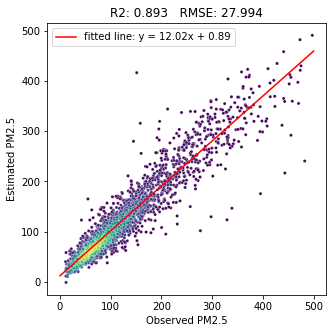

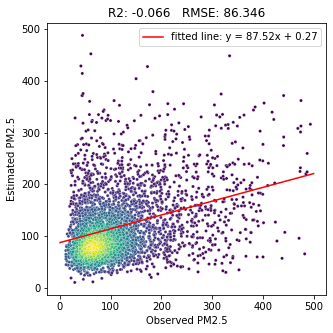

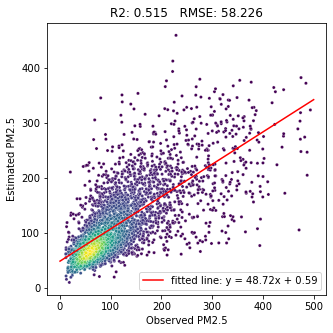

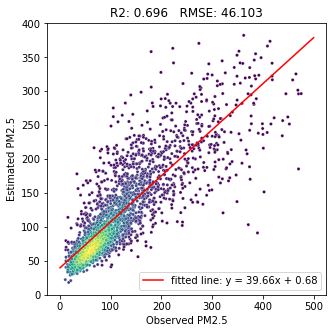

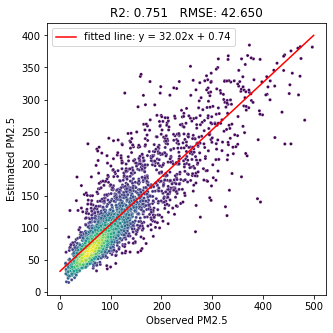

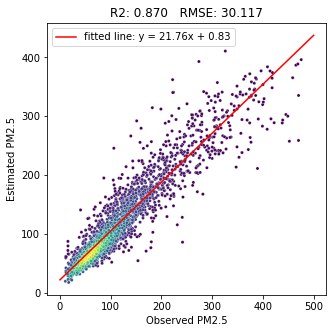

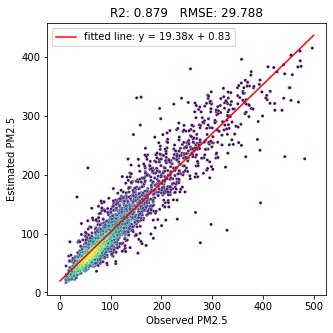

In [3]:

ls = ['cardinalday']
cols = ['PM2.5' ,'RH', 'WS', 'SR', 'BP','AOD47','station id', 'ColumnWV', 'latitude', 'longitude',]

def r2score( cols, reg, df):
    ls = [1]

    print('Initial Features: ', cols)
    for i in ls:

        doi = df[cols]
        doi = doi[doi.isna().any(axis = 1)== False]
        doi = doi.reset_index(drop=True)
        y = doi['PM2.5']
        x= doi.iloc[:, 1:]
        # doi2 = df2[cols]
        # doi2 = doi2[doi2.isna().any(axis = 1)== False]
        # y2 = doi2['PM2.5']
        # x2 = doi2.iloc[:, 1:]
        
        # a,b,c,d = train_test_split(x2, y2,test_size=0.5,random_state =123)
        # X_train, X_test, y_train, y_test = x, a, y, c

        X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25,random_state =123)

        ########################################################################

        model = reg.fit(X_train, y_train)
        target = y_test
        pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, pred , squared=False)

        values = np.vstack([target.to_numpy(),pred])
        kernel = stats.gaussian_kde(values)(values)


        plt.figure(figsize=(5,5))
        xx = np.linspace(0,500, 500)
        res = stats.linregress(target, pred)
        plt.plot(xx, res.intercept + res.slope*xx, 'r', label='fitted line: y = {:.2f}x + {:.2f}'.format(res.intercept, res.slope))
        
        
        plt.title('R2: {:.3f}   RMSE: {:.3f}'.format(reg.score(X_test, y_test), rmse))
        print(reg.score(X_test, y_test) )
        print(rmse)
        sns.scatterplot(
            x=target.to_numpy(),
            y=pred,
            c=kernel,
            cmap="viridis", s = 10
        )
        plt.xlabel('Observed PM2.5')
        plt.ylabel('Estimated PM2.5')
        # sns.regplot( x=target.to_numpy(),
        #     y=pred)
lis= []
# a = pd.DataFrame(zip(cols[1:], model.feature_importances_), columns = ['Feature', 'Importance'])
# plt.figure()
# plt.title('Feature Importance')
# plt.barh(a['Feature'], a['Importance'])

sat1 = ['PM2.5', 'station id', 'AOD47']
sat2 = ['ColumnWV']
meteor = ['RH', 'WS', 'SR', 'BP']
gas = ['NOx','SO2', 'NH3', 'CO']
extra = ['latitude', 'longitude', 'cardinalday']
cols = ['PM2.5' ,'RH', 'WS', 'SR', 'BP','AOD47_5','station id', 'ColumnWV', 'latitude', 'longitude']
reg1 = GradientBoostingRegressor( random_state=50)
reg2 = XGBRegressor( random_state=50)
reg3 = ExtraTreesRegressor( random_state=50)
regs = [reg1, reg2, reg3]

def r2scoreitr(regs):
    for i in regs:
        print(i)

        cols = sat1
        r2score(cols, i , df)

        cols = sat1 + sat2
        r2score(cols, i , df)

        cols = sat1 + sat2 + meteor
        r2score(cols, i , df)

        cols = sat1 + sat2 + gas
        r2score(cols, i , df)

        cols = sat1 + sat2 + meteor + extra
        r2score(cols, i , df)

        cols = sat1 + sat2 + gas + extra
        r2score(cols, i , df)

r2scoreitr(regs)

In [5]:
ls = ['cardinalday']
cols = ['PM2.5' ,'RH', 'WS', 'SR', 'BP','AOD47','station id', 'ColumnWV', 'latitude', 'longitude',]
reg = GradientBoostingRegressor( random_state=50)
#reg = XGBRegressor( random_state=50)
#reg = ExtraTreesRegressor( random_state=50)

def kfscore( cols, reg, df):
    ls = [1]

    print('Initial Features: ', cols)
    for i in ls:
        score = []

        doi = df[cols]
        doi = doi[doi.isna().any(axis = 1)== False]
        doi = doi.reset_index(drop=True)
        y = doi['PM2.5']
        x= doi.iloc[:, 1:]
        # doi2 = df2[cols]
        # doi2 = doi2[doi2.isna().any(axis = 1)== False]
        # y2 = doi2['PM2.5']
        # x2 = doi2.iloc[:, 1:]
        
        # a,b,c,d = train_test_split(x2, y2,test_size=0.5,random_state =123)
        # X_train, X_test, y_train, y_test = x, a, y, c

        #X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25,random_state =123)
        #X_train, X_test, y_train, y_test = x, x2, y, y2

        ########################################################################

        # gs = GroupShuffleSplit(n_splits=10, test_size=0.2, random_state=123)
        # train_ix, test_ix = next(gs.split(df[cols], df['PM2.5'], groups=df['station id']))
        # X_train = x.loc[x.index.intersection(train_ix)]
        # y_train = y.loc[y.index.intersection(train_ix)]

        # X_test = x.loc[x.index.intersection(test_ix)]
        # y_test = y.loc[y.index.intersection(test_ix)]

    ##############################################################################

        group_kfold = GroupKFold(n_splits=10)
        xx=0
        
        for train_ix, test_ix in group_kfold.split(x, y, x['station id']):
            # print(xx)
            
            # print(x.loc[x.index.intersection(train_ix)]['station id'].unique())
            # print(x.loc[x.index.intersection(test_ix)]['station id'].unique())

            # print("TRAIN:", train_index, "TEST:", test_index)
            X_train = x.loc[x.index.intersection(train_ix)]
            y_train = y.loc[y.index.intersection(train_ix)]

            X_test = x.loc[x.index.intersection(test_ix)]
            y_test = y.loc[y.index.intersection(test_ix)]
            xx+=1
            if(xx==50):
                break

    ###############################################################################################
            X_train = X_train[X_train.columns.drop('station id')]
            X_test = X_test[X_test.columns.drop('station id')]
            model = reg.fit(X_train, y_train)
            target = y_test
            pred = model.predict(X_test)

            values = np.vstack([target.to_numpy(),pred])
            kernel = stats.gaussian_kde(values)(values)
            # plt.figure(figsize=(5,5))
            # plt.title('R2: {:.3f}, Added feature: {}'.format(reg.score(X_test, y_test), i))
            score.append(reg.score(X_test, y_test))
            # sns.scatterplot(
            #     x=target.to_numpy(),
            #     y=pred,
            #     c=kernel,
            #     cmap="viridis"
            # )
            # sns.regplot( x=target.to_numpy(),
            #     y=pred)
        print(np.mean(score))
    lis= []
    # a = pd.DataFrame(zip(cols[2:], model.feature_importances_), columns = ['Feature', 'Importance'])
    # plt.figure()
    # plt.title('Feature Importance')
    # plt.barh(a['Feature'], a['Importance'])

sat1 = ['PM2.5', 'station id', 'AOD47_5']
sat2 = ['ColumnWV']
meteor = ['RH', 'WS', 'SR', 'BP']
gas = ['NOx','SO2', 'NH3', 'CO']
extra = ['latitude', 'longitude', 'cardinalday']
cols = ['PM2.5' ,'RH', 'WS', 'SR', 'BP','AOD47','station id', 'ColumnWV', 'latitude', 'longitude']
reg1 = GradientBoostingRegressor( random_state=50)
reg2 = XGBRegressor( random_state=50)
reg3 = ExtraTreesRegressor( random_state=50)
regs = [reg1, reg2, reg3]

def kfscoreitr(regs):
    for i in regs:
        print(i)

        cols = sat1
        kfscore(cols, i , df)

        cols = sat1 + sat2
        kfscore(cols, i , df)

        cols = sat1 + sat2 + meteor
        kfscore(cols, i , df)

        cols = sat1 + sat2 + gas
        kfscore(cols, i , df)

        cols = sat1 + sat2 + meteor + extra
        kfscore(cols, i , df)

        cols = sat1 + sat2 + gas + extra
        kfscore(cols, i , df)

kfscoreitr(regs)

GradientBoostingRegressor(random_state=50)
Initial Features:  ['PM2.5', 'station id', 'AOD47_5']
0.26446259372698533
Initial Features:  ['PM2.5', 'station id', 'AOD47_5', 'ColumnWV']
0.5730813939866399
Initial Features:  ['PM2.5', 'station id', 'AOD47_5', 'ColumnWV', 'RH', 'WS', 'SR', 'BP']
0.6142324932139847
Initial Features:  ['PM2.5', 'station id', 'AOD47_5', 'ColumnWV', 'NOx', 'SO2', 'NH3', 'CO']
0.6629181309250181
Initial Features:  ['PM2.5', 'station id', 'AOD47_5', 'ColumnWV', 'RH', 'WS', 'SR', 'BP', 'latitude', 'longitude', 'cardinalday']
0.7771623736394209
Initial Features:  ['PM2.5', 'station id', 'AOD47_5', 'ColumnWV', 'NOx', 'SO2', 'NH3', 'CO', 'latitude', 'longitude', 'cardinalday']
0.7893850848677465
XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learnin